<a href="https://colab.research.google.com/github/BelenFranzoni/DiploCsDatos2024/blob/main/IntroduccionAprendizajeAutomatico/Lab_1_Marcelo_4_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1: Regresión en California

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "California Housing dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [4]:
from sklearn.datasets import fetch_california_housing
X_california, y_california = fetch_california_housing(return_X_y=True, as_frame=True)
california = fetch_california_housing()

In [5]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:

print(california['DESCR'])  # descripción del dataset
#california['feature_names'] # nombres de los atributos para cada columna de 'data'
#california['data']           # matriz con los datos de entrada (atributos)
#print(california['target']) # vector de valores a predecir

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
california['data'].shape, california['target'].shape

((20640, 8), (20640,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [9]:
from sklearn.model_selection import train_test_split
X, y = california['data'], california['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)
X_train.shape, X_test.shape

((15480, 8), (5160, 8))

In [10]:
y.shape

(20640,)

In [11]:
y_test.shape

(5160,)

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

##  <font color ="Blue"> **1.** ¿De qué se trata el conjunto de datos?

El Conjunto de datos está formado por dos np.arrays, uno con las variables independientes (8) y otro con la variable dependiente que se tratará de predecir.
El conjutno de datos fue tomado en el Censo de U.S. de 1990.
Se agruparon distintas variables independientes por bloques conteniendo en promedio 1425,5 habitantes viviendo en áreas geográficamente compactas.[1]  

##  <font color ="Blue"> **2.** ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?


La variable independiente representa la media del valor de una unidad habitacional en cada bloque del Distrito de California. Se expresa en cientos de miles de dólares ($100,000).


##  <font color ="Blue"> **3.**¿Qué información (atributos) hay disponibles para hacer la predicción?

Las variables independientes o atributos disponibles son:


- MedInc        Salario Medio en cada bloque
- HouseAge      MEdia de la Edad de cada unidad habitacional en el bloque
- AveRooms      Promedio de ambientes por unidad habitacional
- AveBedrms     Promedio de dormitorios por unidad habitacional
- Population    Población de cada bloque
- AveOccup      Promedio de ocupantes por unidad habitacional
- Latitude      Latitud, evaluada con el centro geográfico de cada bloque
- Longitude     Longitud, evaluada con el centro geográfico de cada bloque

##  <font color ="Blue"> **4.**¿Qué atributos imagina ud. que serán los más determinantes para la predicción?

Los atributos que *a priori* podrían ser más determinantes podrían ser:

- MedInc        Salario Medio en cada bloque
- AveRooms      Promedio de ambientes por unidad habitacional
- Population    Población de cada bloque
- Latitude      Latitud, evaluada con el centro geográfico de cada bloque
- Longitude     Longitud, evaluada con el centro geográfico de cada bloque

## <font color ="Blue"> **5**. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc?

Tras un primer análisis encuentro que puede existir algún problema con respecto a los valores máximos de los valores de las unidades habitacionales.

Sospecho que en el censo se fijó un valor máximo de u$s 500.000 (5 en unidades de cientos de miles de dólares), esto puede hacer perder referencia para unidades que podrían tener un mayor valor.

Este mismo problema de "sesgo" por errores en el diseño del set de datos se observa para el promedio de edad de las propiedades, donde el límite es 55 años.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

Atributos a graficar: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']




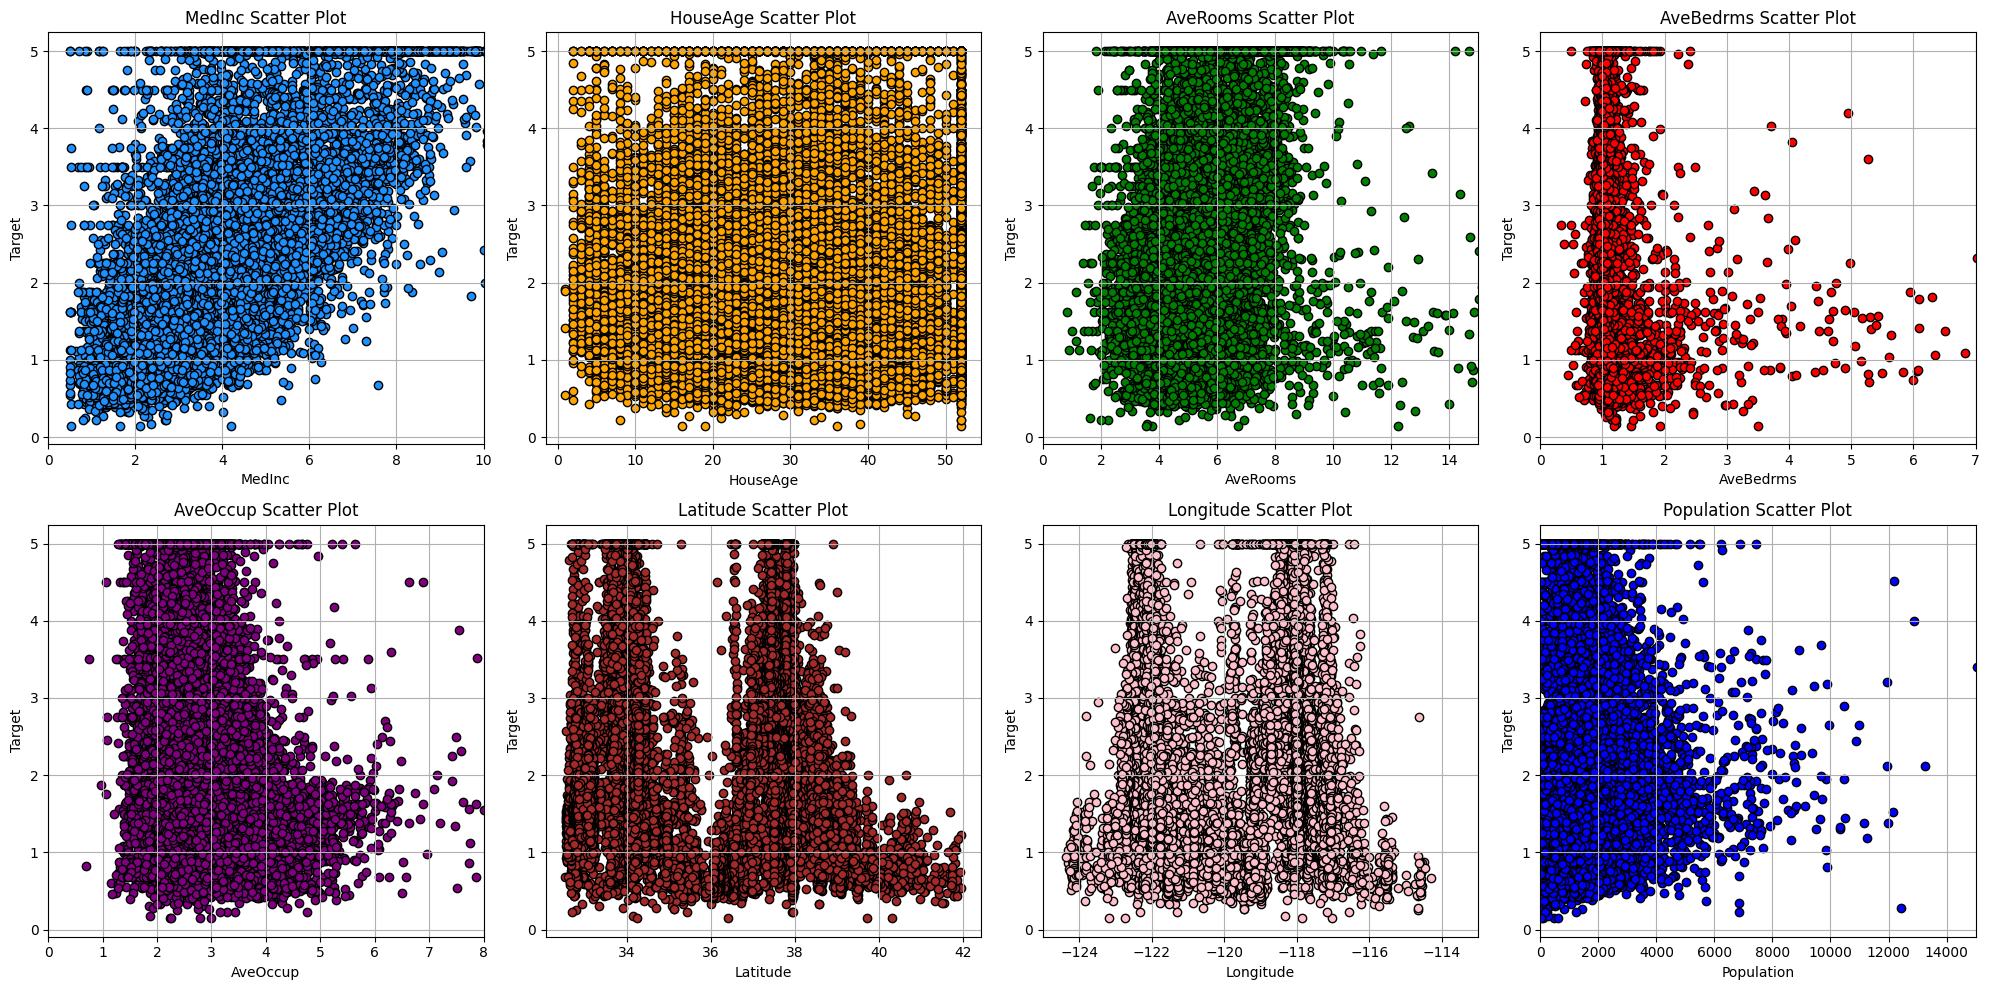

In [14]:
#@title Graficamos la relación entre todos los atributos y la variable independiente
# Get the feature names
feature_names = california['feature_names']

# Display the feature names
print("Atributos a graficar:", feature_names)
print()
print()
# Vamos a hacer un análisis de las 8 variables con la variable objetivo
# Create a figure with 2x4 subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# First plot: MedInc
feature = 'MedInc'
selector = (np.array(california['feature_names']) == feature)
axes[0, 0].scatter(X[:, selector].flatten(), y, facecolor="dodgerblue", edgecolor="k", label="datos")
axes[0, 0].set_title(f'{feature} Scatter Plot')
axes[0, 0].set_xlabel('MedInc')
axes[0, 0].set_ylabel('Target')
axes[0, 0].set_xlim([0, 10])
axes[0, 0].grid(True)

# Second plot: HouseAge
feature = 'HouseAge'
selector = (np.array(california['feature_names']) == feature)
axes[0, 1].scatter(X[:, selector].flatten(), y, facecolor="orange", edgecolor="k", label="datos")
axes[0, 1].set_title(f'{feature} Scatter Plot')
axes[0, 1].set_xlabel('HouseAge')
axes[0, 1].set_ylabel('Target')
#axes[0, 1].set_xlim([0, 60])
axes[0, 1].grid(True)

# Third plot: AveRooms
feature = 'AveRooms'
selector = (np.array(california['feature_names']) == feature)
axes[0, 2].scatter(X[:, selector].flatten(), y, facecolor="green", edgecolor="k", label="datos")
axes[0, 2].set_title(f'{feature} Scatter Plot')
axes[0, 2].set_xlabel('AveRooms')
axes[0, 2].set_ylabel('Target')
axes[0, 2].set_xlim([0, 15])
axes[0, 2].grid(True)

# Fourth plot: AveBedrms
feature = 'AveBedrms'
selector = (np.array(california['feature_names']) == feature)
axes[0, 3].scatter(X[:, selector].flatten(), y, facecolor="red", edgecolor="k", label="datos")
axes[0, 3].set_title(f'{feature} Scatter Plot')
axes[0, 3].set_xlabel('AveBedrms')
axes[0, 3].set_ylabel('Target')
axes[0, 3].set_xlim([0, 7])
axes[0, 3].grid(True)

# Fifth plot: AveOccup
feature = 'AveOccup'
selector = (np.array(california['feature_names']) == feature)
axes[1, 0].scatter(X[:, selector].flatten(), y, facecolor="purple", edgecolor="k", label="datos")
axes[1, 0].set_title(f'{feature} Scatter Plot')
axes[1, 0].set_xlabel('AveOccup')
axes[1, 0].set_ylabel('Target')
axes[1, 0].set_xlim([0, 8])
axes[1, 0].grid(True)

# Sixth plot: Latitude
feature = 'Latitude'
selector = (np.array(california['feature_names']) == feature)
axes[1, 1].scatter(X[:, selector].flatten(), y, facecolor="brown", edgecolor="k", label="datos")
axes[1, 1].set_title(f'{feature} Scatter Plot')
axes[1, 1].set_xlabel('Latitude')
axes[1, 1].set_ylabel('Target')
#axes[1, 1].set_xlim([32, 42])
axes[1, 1].grid(True)

# Seventh plot: Longitude
feature = 'Longitude'
selector = (np.array(california['feature_names']) == feature)
axes[1, 2].scatter(X[:, selector].flatten(), y, facecolor="pink", edgecolor="k", label="datos")
axes[1, 2].set_title(f'{feature} Scatter Plot')
axes[1, 2].set_xlabel('Longitude')
axes[1, 2].set_ylabel('Target')
axes[1, 2].set_xlim([-125, -113])  # Example limit, adjust as needed
axes[1, 2].grid(True)

# Eigth plot: Population
feature = 'Population'
selector = (np.array(california['feature_names']) == feature)
axes[1, 3].scatter(X[:, selector].flatten(), y, facecolor="blue", edgecolor="k", label="datos")
axes[1, 3].set_title(f'{feature} Scatter Plot')
axes[1, 3].set_xlabel('Population')
axes[1, 3].set_ylabel('Target')
axes[1, 3].set_xlim([0, 15000])  # Example limit, adjust as needed
axes[1, 3].grid(True)


# Adjust layout
plt.tight_layout()


# Show the plots
plt.show()


## Respuesta

Considero que los atributos que mayor podrían aportar a la predicción podrían ser:

- 1) MedInc        Salario Medio en cada bloque
- 2) AveRooms      Promedio de ambientes por unidad habitacional
- 3) AveOccup      Promedio de ocupantes por unidad habitacional
- 4) AveBedrms     Promedio de dormitorios por unidad habitacional
- 5) Latitude      Latitud, evaluada con el centro geográfico de cada bloque
- 6) Longitude     Longitud, evaluada con el centro geográfico de cada bloque

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [69]:
# 1. Resolver acá. Ayuda:
#@title 1) Selección del atributo a Analizar
feature = "MedInc" #@param ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

#feature = 'MedInc'  # selecciono el atributo 'HouseAge'
#selector = califoMedIncrnia['feature_names'].index(feature)
selector = (np.array(california['feature_names']) ==  feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((15480, 1), (5160, 1))

In [70]:
# 2. Instanciar y entrenar acá.
#@title 2) Realizo la regresión lineal sobre el Grupo de entrenamiento
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train_f, y_train)
LR_square = regr.score(X_train_f, y_train)
LR_coef = regr.coef_
LR_intercept = regr.intercept_
print("Análisis de Regresion Lineal para la variable:",feature)
print("------------")
print("El valor de R^2 de la correlacion es:", LR_square)
print("El valor de la pendiente es:", LR_coef)
print("El valor de la ordenada al origen es", LR_intercept)


Análisis de Regresion Lineal para la variable: MedInc
------------
El valor de R^2 de la correlacion es: 0.48061930819884535
El valor de la pendiente es: [0.42273457]
El valor de la ordenada al origen es 0.43642774209171264


In [71]:
# 3. Predecir y evaluar acá.
#@title 3) Predigo el error del set de entrenamiento (Train error) y del set de evaluación (Val error)
## Calculo los valores de predicción para el set de entrenamiento
y_pred_train = regr.predict(X_train_f)

## Calculo los valores de Predicción para el set de prueba -Test
y_pred_test = regr.predict(X_test_f)

### Vamos a usar la herramienta de SciKitLearn MeanSquaredError
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_pred_train)
test_error = mean_squared_error(y_test, y_pred_test)
print(f'Train error: {train_error:f}')
print(f'Val error: {test_error:f}')




Train error: 0.693191
Val error: 0.725353


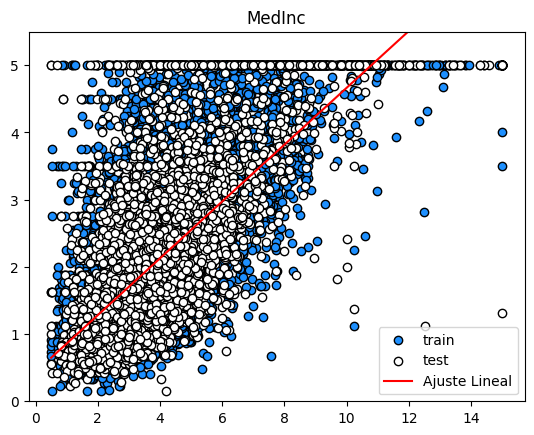

In [72]:
# 4. Graficar acá.
#@title Graficos comprando los sets, y la correlación
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
# plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(x, [LR_coef*i+LR_intercept for i in x],color="red", label="Ajuste Lineal")
plt.title(feature)
plt.ylim([0, 5.5])
plt.legend()
plt.show()

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [73]:
#@title A continuaciòn realizamos los ajustes polinomiales desde el polinomio de Grado 2 al 9
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample data (for the sake of this example, replace these with your actual data)
# X_train_f, y_train, X_test_f, y_test = ...

# List to store results
results = []

# Loop over degrees from 1 to 9
for degree in range(1, 10):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly_train_f = poly.fit_transform(X_train_f)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_poly_train_f, y_train)

    # Extract the parameters
    intercept = model.intercept_
    coefficients = model.coef_

    print(f"Degree: {degree}")
    print("Intercept:", intercept)
    print("Coefficients:", coefficients)

    ## Calculate the error for the train set
    y_train_prep_p = model.predict(X_poly_train_f)
    train_error_p = mean_squared_error(y_train, y_train_prep_p)
    print(f'Polynomial Fit Grade {degree} Train error: {train_error_p:f}')

    ## Calculate the error for the test set
    X_poly_test_f = poly.fit_transform(X_test_f)
    y_test_prep_p = model.predict(X_poly_test_f)
    test_error_p = mean_squared_error(y_test, y_test_prep_p)
    print(f'Polynomial Fit Grade {degree} Test error: {test_error_p:f}')
    print('--------------')

    # Store the results in the list
    results.append((degree, train_error_p, test_error_p))

# Print the results
print("\nResults:")
for degree, train_error, test_error in results:
    print('...............')
    print(f"Degree: {degree}, Train error: {train_error}, Test error: {test_error}")

print(results)


Degree: 1
Intercept: 0.4364277420916982
Coefficients: [0.         0.42273457]
Polynomial Fit Grade 1 Train error: 0.693191
Polynomial Fit Grade 1 Test error: 0.725353
--------------
Degree: 2
Intercept: 0.20624125362146972
Coefficients: [ 0.          0.52969194 -0.00990386]
Polynomial Fit Grade 2 Train error: 0.687949
Polynomial Fit Grade 2 Test error: 0.716684
--------------
Degree: 3
Intercept: 0.7686550363014064
Coefficients: [ 0.          0.14181007  0.06210175 -0.00359956]
Polynomial Fit Grade 3 Train error: 0.677193
Polynomial Fit Grade 3 Test error: 0.705231
--------------
Degree: 4
Intercept: 0.8915557696464054
Coefficients: [ 0.          0.02571862  0.09610141 -0.00733003  0.00013193]
Polynomial Fit Grade 4 Train error: 0.676995
Polynomial Fit Grade 4 Test error: 0.705257
--------------
Degree: 5
Intercept: 0.8560430887279815
Coefficients: [ 0.00000000e+00  6.96095809e-02  7.78873513e-02 -4.08859930e-03
 -1.20251048e-04  7.00050094e-06]
Polynomial Fit Grade 5 Train error: 0.67

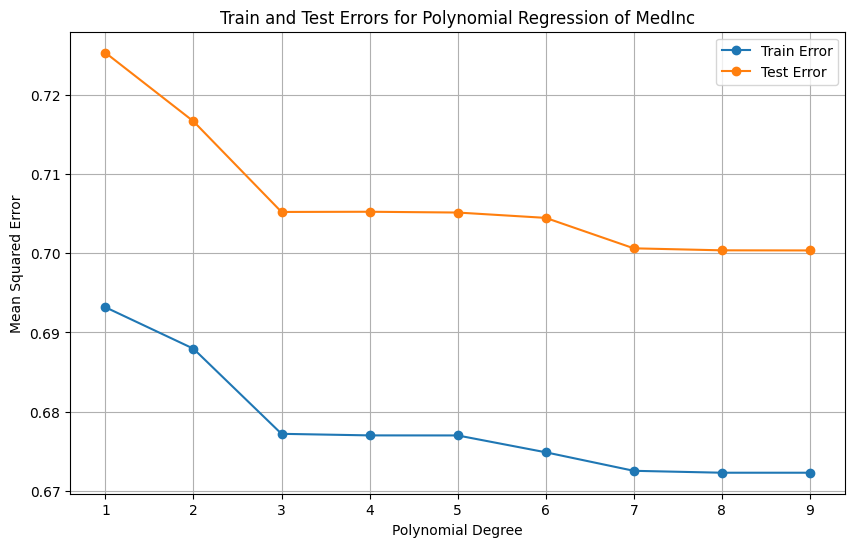

In [74]:
# 2. Graficar curvas de error acá.
#@title Para analizar la posibilidad de sobreentrenamiento realizamos el gráfico del a variación del error al aumentar el grado del polinomio
# Convert results to a numpy array for easy slicing
results = np.array(results)

# Extract degree, train_error, and test_error
degrees = results[:, 0]
train_errors = results[:, 1]
test_errors = results[:, 2]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title(f'Train and Test Errors for Polynomial Regression of {feature}')
plt.legend()
plt.grid(True)
plt.show()

Intercept: 0.7686550363014064
Coefficients: [ 0.          0.14181007  0.06210175 -0.00359956]
Polinomial Fit Grade 3 Train error: 0.677193
Polinomial Fit Grade 3 Test error: 0.705231


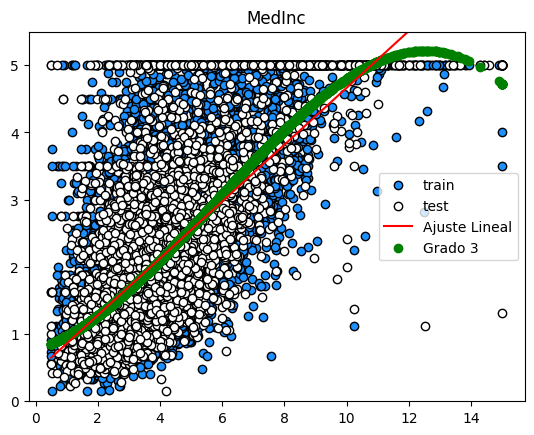

In [75]:
# 4. Graficar acá.
#@title 4) Reconstruir mejor modelo acá y graficar.
#@title
#@title Graficos comparando los sets Train y Test, y la correlación lineal y la polinómica del Grado seleccionado
Degree = "3" #@param ['2', '3', '4', '5', '6', '7', '8', '9']
Degree = int(Degree)
#Replicaremos el Ajuste polinomial

# 1. Resolver acá.
# Create polynomial features
#Degree = 3  # Degree of the polynomial
poly = PolynomialFeatures(Degree)
X_poly_train_f = poly.fit_transform(X_train_f)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_poly_train_f, y_train)

# Extract the parameters
intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

## Calculo el error para el train set:
y_train_prep_p = model.predict(X_poly_train_f)

###
train_error_p = mean_squared_error(y_train, y_train_prep_p)
print(f'Polinomial Fit Grade', Degree, f'Train error: {train_error_p:f}')
#print(f'Val error: {test_error:f}')
## Calculo el error del Test_Set
X_poly_test_f = poly.fit_transform(X_test_f)
y_test_prep_p = model.predict(X_poly_test_f)
test_error_p = mean_squared_error(y_test, y_test_prep_p)

print(f'Polinomial Fit Grade', Degree, f'Test error: {test_error_p:f}')

#test_error = mean_squared_error(y_test, y_pred_test)




## Aquí está la parte del gráfico
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
# plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(x, [LR_coef*i+LR_intercept for i in x],color="red", label="Ajuste Lineal")
plt.scatter(X_train_f, y_train_prep_p, label=f'Grado {Degree}',color="Green")
plt.title(feature)
plt.ylim([0, 5.5])
plt.legend()
plt.show()
#plt.plot(x, y_poly_pred, label=f'Grado {degree1}')



## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [80]:
#@title A continuación realizamos los ajustes polinomiales con 2 Atributos a Seleccionar:

# 1. Resolver acá. Ayuda (con dos atributos):
Atributo_1 = "MedInc" #@param ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Atributo_2 = "AveRooms" #@param ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

selector = (np.array(california['feature_names']) == Atributo_1) | (np.array(california['feature_names']) == Atributo_2)

X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((15480, 2), (5160, 2))

In [ ]:
# 2. Resolver acá.


In [79]:
# 2 resolver la multinomial
#@title Seleccionaremos el Grado
#@title
#@title Graficos comparando los sets Train y Test, y la correlación lineal y la polinómica del Grado seleccionado
Degree = "5" #@param ['2', '3', '4', '5', '6', '7', '8', '9']
Degree2 = int(Degree)
#Replicaremos el Ajuste polinomial

# 1. Resolver acá.
# Create polynomial features
#Degree = 3  # Degree of the polynomial
poly = PolynomialFeatures(Degree2)
X_poly_train_fs = poly.fit_transform(X_train_fs)

### Comento estas lineas
## Fit the linear regression model
model = LinearRegression()
model.fit(X_poly_train_fs, y_train)

# Extract the parameters
#intercept = model.intercept_
#coefficients = model.coef_

#print("Intercept:", intercept)
#print("Coefficients:", coefficients)

## Calculo el error para el train set:
y_train_prep_ps = model.predict(X_poly_train_fs)

###
train_error_p = mean_squared_error(y_train, y_train_prep_p)
print(f'Variables empleadas', Atributo_1, Atributo_2)
print(f'Polinomial Fit Grade', Degree2, f'Train error: {train_error_p:f}')
print(f'Val error: {test_error:f}')
## Calculo el error del Test_Set
X_poly_test_fs = poly.fit_transform(X_test_fs)
y_test_prep_ps = model.predict(X_poly_test_fs)
test_error_ps = mean_squared_error(y_test, y_test_prep_p)

print(f'Polinomial Fit Grade', Degree, f'Test error: {test_error_p:f}')

#test_error = mean_squared_error(y_test, y_pred_test)





Variables empleadas MedInc AveOccup
Polinomial Fit Grade 5 Train error: 0.677193
Val error: 0.700368
Polinomial Fit Grade 5 Test error: 0.705231


## ¿Se obtuvieron mejores modelos? ¿Porqué?

Yo creo que hay que limpiar el data set, hay valores que desvían los intentos de correlación.
Lo podemos hablar en alguna reunión.

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
